# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 
import seaborn as sns

# Import the three Input Datasets

In [3]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [8]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(7042, 21)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


# Data Pre-processing

In [13]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [15]:
# Total Charges will be related to Monthly Charges.
# We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges
value = telecom['MonthlyCharges'] * telecom['tenure']

In [16]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other=telecom['TotalCharges'])

In [17]:
telecom['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
Name: TotalCharges, Length: 7042, dtype: float64

# Exploratory Data Analysis (EDA)

##  Univariate Analysis

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  309.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

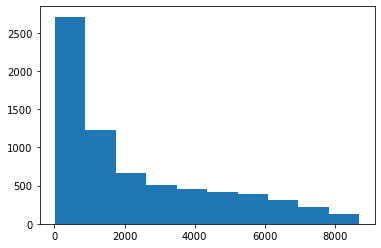

In [18]:
# Distribution of Total Charges Field

plt.hist(telecom['TotalCharges'])

## Churn Split in terms of Counts

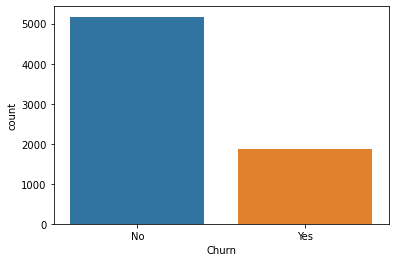

In [19]:
# Display the counts of Churns in the entire data. This provides an indication of whether the data is unbalanced.

plt1 = sns.countplot(telecom['Churn'])

## Tenure

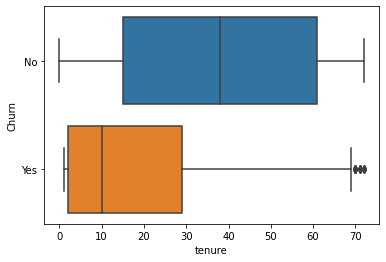

In [20]:
# The time for which a customer has been using the service.
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

## Find for which kind of Contracts the churn probability is more

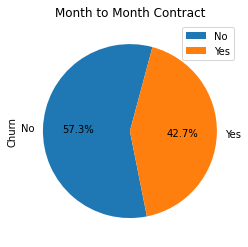

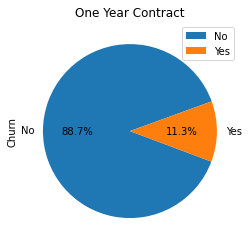

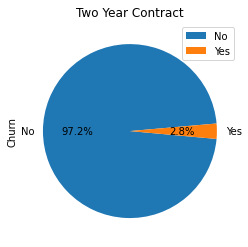

In [21]:
pie_Contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom[telecom['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom[telecom['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

## Whether being on Monthly Charges is influencing Churn 

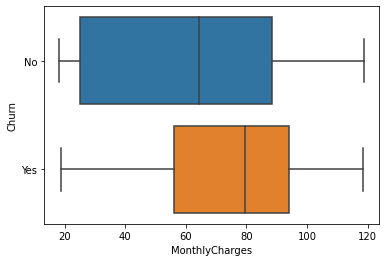

In [22]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

## Whether TotalCharges amount has influence on Churn

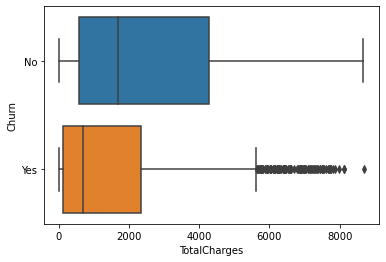

In [23]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

## Whether having Multiple Internet Connections have influence on Churn

<Figure size 1080x360 with 0 Axes>

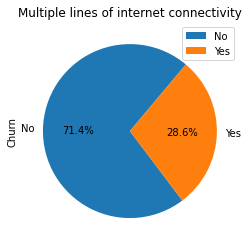

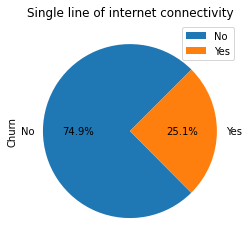

In [24]:
# Whether a customer has multiple lines of internet connectivity.
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

# # Multiple lines of internet connectivity doesn't effect churn that much.

## Whether type of Internet Service has influence on Churn

<Figure size 1080x360 with 0 Axes>

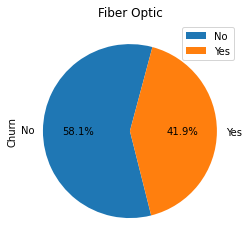

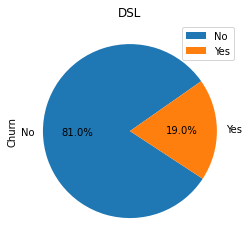

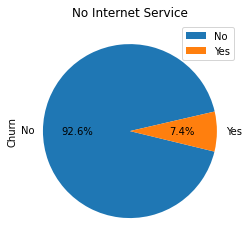

In [25]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(telecom[telecom['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(telecom[telecom['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(telecom[telecom['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

# Data Pre-processing

## Convert Binary Categorical Features (Yes/No) to 0/1

In [26]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [27]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


## For Nominal Categorical Features with multiple possible values, create dummy variable (one-hot encoding)

In [28]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

### Dropping the Original Features

In [29]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [30]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7042 non-null   object 
 1   tenure                                 7042 non-null   int64  
 2   PhoneService                           7042 non-null   int64  
 3   PaperlessBilling                       7042 non-null   int64  
 4   MonthlyCharges                         7042 non-null   float64
 5   TotalCharges                           7031 non-null   float64
 6   Churn                                  7042 non-null   int64  
 7   SeniorCitizen                          7042 non-null   int64  
 8   Partner                                7042 non-null   int64  
 9   Dependents                             7042 non-null   int64  
 10  Contract_One year                      7042 non-null   uint8  
 11  Cont

### Checking for Missing Values and Inputing Them

In [32]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

#### It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [33]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [34]:
# Checking percentage of missing values after removing the missing values
round(100 * (telecom.isnull().sum() / len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

## Test-Train Split of Input Dataset

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Putting feature variable to X
X = telecom.drop(['customerID'], axis=1)
y = X.pop('Churn')

In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.032381,1,1,-0.333459,-0.269045,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5789,-0.293230,1,0,-1.491062,-0.793442,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5008,-1.066555,1,0,-1.496045,-0.951355,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
880,-0.903749,1,1,1.508408,-0.543097,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.147957,1,1,1.109808,-0.828210,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1


## Finding Correlations among Features

In [42]:
# Check the corr values of final list of variables
cor = telecom.corr()
cor

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007815,0.004663,0.246663,0.825837,-0.353989,0.015771,0.382176,0.163540,0.202469,...,-0.037432,0.361341,-0.037432,0.361348,-0.037432,0.325084,-0.037432,0.280087,-0.037432,0.285228
PhoneService,0.007815,1.000000,0.016658,0.248004,0.112948,0.011720,0.008412,0.018443,-0.001047,-0.003118,...,0.171846,-0.052102,0.171846,-0.070150,0.171846,-0.095229,0.171846,-0.021444,0.171846,-0.033540
PaperlessBilling,0.004663,0.016658,1.000000,0.351834,0.157646,0.191540,0.156319,-0.013844,-0.110062,-0.052221,...,-0.320552,0.127153,-0.320552,0.103935,-0.320552,0.037360,-0.320552,0.224128,-0.320552,0.211469
MonthlyCharges,0.246663,0.248004,0.351834,1.000000,0.650949,0.193005,0.219991,0.098031,-0.112235,0.004910,...,-0.763205,0.441744,-0.763205,0.482469,-0.763205,0.338102,-0.763205,0.629578,-0.763205,0.627145
TotalCharges,0.825837,0.112948,0.157646,0.650949,1.000000,-0.199374,0.102568,0.319462,0.064861,0.170769,...,-0.374843,0.510474,-0.374843,0.522708,-0.374843,0.432621,-0.374843,0.515554,-0.374843,0.519715
Churn,-0.353989,0.011720,0.191540,0.193005,-0.199374,1.000000,0.150509,-0.150078,-0.163193,-0.178277,...,-0.227633,-0.082374,-0.227633,-0.066085,-0.227633,-0.164615,-0.227633,0.063371,-0.227633,0.060976
SeniorCitizen,0.015771,0.008412,0.156319,0.219991,0.102568,0.150509,1.000000,0.016897,-0.210600,-0.046524,...,-0.182558,0.066621,-0.182558,0.059609,-0.182558,-0.060490,-0.182558,0.105538,-0.182558,0.119936
Partner,0.382176,0.018443,-0.013844,0.098031,0.319462,-0.150078,0.016897,1.000000,0.452223,0.083003,...,-0.000358,0.141764,-0.000358,0.153777,-0.000358,0.120450,-0.000358,0.124679,-0.000358,0.118302
Dependents,0.163540,-0.001047,-0.110062,-0.112235,0.064861,-0.163193,-0.210600,0.452223,1.000000,0.069178,...,0.138341,0.023573,0.138341,0.014030,0.138341,0.063211,0.138341,-0.016384,0.138341,-0.038264
Contract_One year,0.202469,-0.003118,-0.052221,0.004910,0.170769,-0.178277,-0.046524,0.083003,0.069178,1.000000,...,0.038024,0.084065,0.038024,0.103028,0.038024,0.096391,0.038024,0.062031,0.038024,0.064880


In [43]:
# Find out the Fields with high correlation

correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.7:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8258366487064654 -- 4 -- 0 -- TotalCharges -- tenure
0.7871514742715182 -- 15 -- 3 -- InternetService_Fiber optic -- MonthlyCharges
0.7632046925843156 -- 16 -- 3 -- InternetService_No -- MonthlyCharges
1.0000000000000002 -- 17 -- 1 -- MultipleLines_No phone service -- PhoneService
0.7632046925843156 -- 19 -- 3 -- OnlineSecurity_No internet service -- MonthlyCharges
1.0 -- 19 -- 16 -- OnlineSecurity_No internet service -- InternetService_No
0.7632046925843156 -- 21 -- 3 -- OnlineBackup_No internet service -- MonthlyCharges
1.0 -- 21 -- 16 -- OnlineBackup_No internet service -- InternetService_No
1.0 -- 21 -- 19 -- OnlineBackup_No internet service -- OnlineSecurity_No internet service
0.7632046925843156 -- 23 -- 3 -- DeviceProtection_No internet service -- MonthlyCharges
1.0 -- 23 -- 16 -- DeviceProtection_No internet service -- InternetService_No
1.0 -- 23 -- 19 -- DeviceProtection_No internet service -- OnlineSecurity_No internet service
1.0 -- 23 -- 21 -- DeviceProtection_No interne

In [44]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')
------
{'MonthlyCharges', 'MultipleLines_No phone service', 'InternetService_No', 'OnlineBackup_No internet service', 'StreamingTV_No i

## Dropping highly correlated dummy variables

In [45]:
X_test = X_test.drop(['TotalCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'StreamingMovies_No internet service', 
                'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service'], 1)
X_train = X_train.drop(['TotalCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'StreamingMovies_No internet service', 
                'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'DeviceProtection_No internet service'], 1)

## Repeat the Correlation Matrix/Heatmap

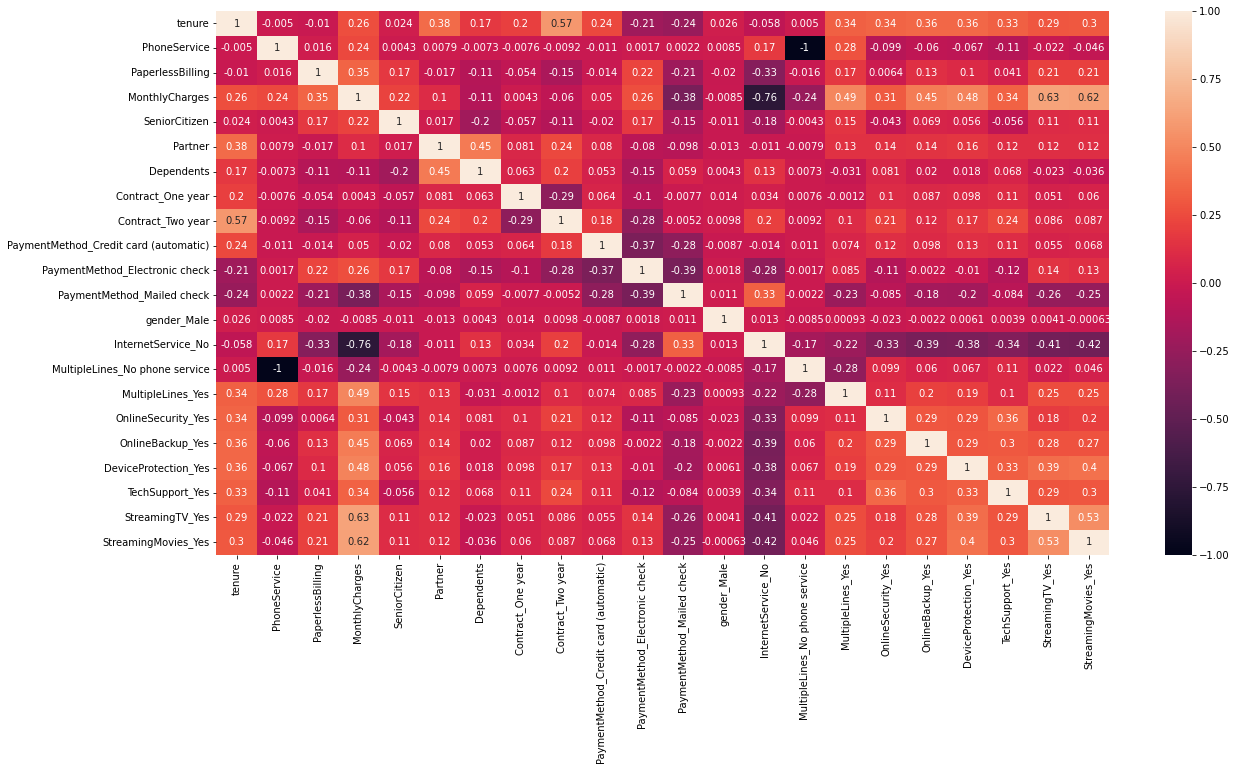

In [46]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Create our Logistic Regression Model

#### add_constant()
By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.

In [47]:
from statsmodels.tools import add_constant as add_constant
X_train_constant = add_constant(X_train)
X_train_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0.032381,1,1,-0.333459,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
5789,1.0,-0.293230,1,0,-1.491062,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5008,1.0,-1.066555,1,0,-1.496045,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
880,1.0,-0.903749,1,1,1.508408,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,1
2784,1.0,-1.147957,1,1,1.109808,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1


In [48]:
cols = X_train_constant.columns
model = smd.Logit(y_train, X_train_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.413365
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4899
Method:                           MLE   Df Model:                           21
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.2838
Time:                        14:13:33   Log-Likelihood:                -2034.2
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3525        nan        nan        nan         nan         nan
tenure                                   -0.8387      0.071    -11.893      0.000      -0.977      -0.700
PhoneService                             -0.7018        nan        nan        nan         nan         nan
PaperlessBilling                          0.3239      0.089      3.641      0.000       0.150       0.498
MonthlyCharges                            1.0003      0.130      7.697      0.000       0.746       1.255
SeniorCitizen                             0.4013      0.101      3.961      0.000       0.203       0.600
Partner                                   0.0091      0.092      0.099      0.921      -0.172       0.190
Dependents                               -0.1777      0.107     -1.657      0.098      -0.388       0.032
Contract_One year                        -0.7022      0.129     -5.431      0.000      -0.956      -0.449
Contract_Two year                        -1.3869      0.213     -6.525      0.000      -1.804      -0.970
PaymentMethod_Credit card (automatic)    -0.0834      0.136     -0.612      0.541      -0.350       0.184
PaymentMethod_Electronic check            0.2629      0.114      2.316      0.021       0.040       0.485
PaymentMethod_Mailed check               -0.0100      0.137     -0.073      0.942      -0.279       0.259
gender_Male                              -0.0519      0.078     -0.667      0.505      -0.204       0.101
InternetService_No                       -0.1385      0.224     -0.619      0.536      -0.578       0.300
MultipleLines_No phone service            0.3493        nan        nan        nan         nan         nan
MultipleLines_Yes                         0.1613      0.099      1.625      0.104      -0.033       0.356
OnlineSecurity_Yes                       -0.5175      0.101     -5.102      0.000      -0.716      -0.319
OnlineBackup_Yes                         -0.3076      0.094     -3.283      0.001      -0.491      -0.124
DeviceProtection_Yes                     -0.1030      0.097     -1.060      0.289      -0.293       0.087
TechSupport_Yes                          -0.5099      0.102     -5.014      0.000      -0.709      -0.311
StreamingTV_Yes                          -0.0992      0.108     -0.921      0.357      -0.310       0.112
StreamingMovies_Yes                      -0.0958      0.108     -0.886      0.376      -0.308       0.116
=========================================================================================================
"""

## Feature Selection: Drop Features with P-Value > 0.05

In [49]:
drop_cols = ['PhoneService', 'Partner', 'Dependents', 'PaymentMethod_Electronic check', 
             'PaymentMethod_Mailed check', 'gender_Male', 'InternetService_No', 'MultipleLines_No phone service', 
             'MultipleLines_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes']

In [50]:
X_train_constant.drop(drop_cols, axis=1, inplace=True)

## Recreate the Logit Model with updated set of columns

In [51]:
model = smd.Logit(y_train, X_train_constant)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.420458
         Iterations 8


In [52]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           11
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.2715
Time:                        14:15:14   Log-Likelihood:                -2069.1
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0314      0.105     -9.796      0.000      -1.238      -0.825
tenure                                   -0.8215      0.065    -12.729      0.000      -0.948      -0.695
PaperlessBilling                          0.4182      0.087      4.793      0.000       0.247       0.589
MonthlyCharges                            0.8542      0.060     14.144      0.000       0.736       0.973
SeniorCitizen                             0.5197      0.099      5.261      0.000       0.326       0.713
Contract_One year                        -0.8380      0.127     -6.614      0.000      -1.086      -0.590
Contract_Two year                        -1.5937      0.209     -7.621      0.000      -2.004      -1.184
PaymentMethod_Credit card (automatic)    -0.2167      0.108     -2.001      0.045      -0.429      -0.004
OnlineSecurity_Yes                       -0.4671      0.100     -4.660      0.000      -0.663      -0.271
OnlineBackup_Yes                         -0.2218      0.092     -2.399      0.016      -0.403      -0.041
TechSupport_Yes                          -0.4929      0.101     -4.890      0.000      -0.690      -0.295
StreamingMovies_Yes                       0.0580      0.099      0.589      0.556      -0.135       0.251
=========================================================================================================
"""

#### Now that we Optimized our model using Statsmodel Logit(), we will create a corresponding model using ScikitLearn LogisticRegression()
Some Differences between Logit and LogisticRegression
ScikitLearn LogisticRegression: Uses L2 regularization by default, but regularization can be turned off using penalty=’none’.
StatsModel Logit: Does not use regularization by default.

ScikitLearn LogisticRegression: Includes intercept by default.
StatsModel Logit: Use the add_constant method to include an intercept.

In [53]:
cols_model = ['tenure', 'PaperlessBilling', 'MonthlyCharges',  
             'SeniorCitizen', 'Contract_One year', 'Contract_Two year', 
             'PaymentMethod_Credit card (automatic)', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 
             'TechSupport_Yes', 'StreamingMovies_Yes']

In [54]:
X_train1 = X_train_constant[cols_model]

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train)

LogisticRegression()

## Predict using Training Data

In [56]:
y_train_pred = logreg.predict(X_train1)

In [57]:
sklearn.metrics.accuracy_score(y_train, y_train_pred)

0.7996342206868523

<AxesSubplot:>

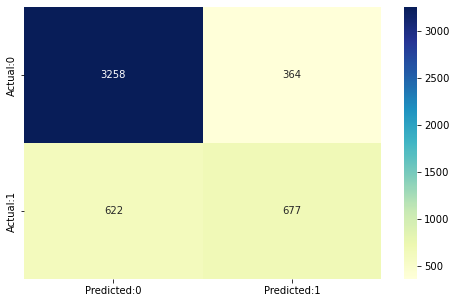

In [58]:
# Create the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Other Classification Statistics

In [59]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [60]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7996342206868523 
 Missclassifications = 1-Accuracy =  0.2003657793131477 
 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.5211701308698999 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8995030369961348 
 Precision/Positive Predictive value = TP/(TP+FP) =  0.6503362151777138 
 Negative predictive Value = TN/(TN+FN) =  0.8396907216494846 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.18592915937027 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.5323271289101358


#### Some Pointers from the above Classification Metrics:
Sensitivity/Recall: In the example of Churn prediction, it gives us the percentage of Correctly Predicted Churns from the pool of Actual Churns.
Specificity: Gives us the percentage of Correctly Predicted Non-Churns from the pool of Actual Non-Churns.
Precision: Gives us the percentage of Correctly Predicted Churns from the pool of Total Predicted Churns.
Plot the ROC Curve and AUC
The ROC (Receiver Operating Characteristic) Curve is an useful tool when predicting the probability of a binary outcome.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values (probability) between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity should be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test (higher AUC).
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

[[0.76005047 0.23994953]
 [0.97850491 0.02149509]
 [0.96016511 0.03983489]
 ...
 [0.93389447 0.06610553]
 [0.88024401 0.11975599]
 [0.91154028 0.08845972]]
Logistic: ROC AUC = 0.841


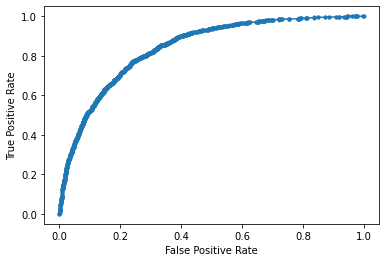

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
lr_probs = logreg.predict_proba(X_train1)
print(lr_probs)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)

# summarize scores
print('Logistic: ROC AUC = %.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [62]:
pd.DataFrame(zip(lr_fpr, lr_tpr), columns=('FPR', 'TPR'))

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000770
2,0.000000,0.004619
3,0.000276,0.004619
4,0.000276,0.013857
...,...,...
1393,0.977637,1.000000
1394,0.978189,1.000000
1395,0.996687,1.000000
1396,0.997239,1.000000


## Creating a dataframe with the actual churn flag and the predicted probabilities

In [63]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':lr_probs})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(20)

,Churn,Churn_Prob,CustID
0,0,0.239950,879
1,0,0.021495,5789
2,0,0.039835,5008
3,1,0.572504,880
4,1,0.698437,2784
5,0,0.006506,3873
6,0,0.348532,5386
7,1,0.489967,6622
8,1,0.415301,4464
9,0,0.258911,5278


### Observation from above Data: The 1's are assigned higher probability to the 0's. A good classification model will always try to assign higher numbers to the positive cases and assign lower numbers to negatives.

## Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.239950,879,0
1,0,0.021495,5789,0
2,0,0.039835,5008,0
3,1,0.572504,880,1
4,1,0.698437,2784,1


In [65]:
from sklearn import metrics
# Create Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3258  364]
 [ 622  677]]


In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7996342206868523


### Is our probability threshold of 0.5 good? Finding Optimal Cutoff Point...
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [67]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.239950,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.021495,5789,0,1,0,0,0,0,0,0,0,0,0
2,0,0.039835,5008,0,1,0,0,0,0,0,0,0,0,0
3,1,0.572504,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.698437,2784,1,1,1,1,1,1,1,1,0,0,0


In [68]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [69]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.263971  1.000000  0.000000
0.1   0.1  0.603942  0.943033  0.482330
0.2   0.2  0.697013  0.871440  0.634456
0.3   0.3  0.763463  0.761355  0.764219
0.4   0.4  0.790083  0.644342  0.842352
0.5   0.5  0.799634  0.521170  0.899503
0.6   0.6  0.794554  0.364896  0.948647
0.7   0.7  0.768543  0.167821  0.983987
0.8   0.8  0.742329  0.030793  0.997515
0.9   0.9  0.736029  0.000000  1.000000


## Plot accuracy - sensitivity - specificity against various probabilities.

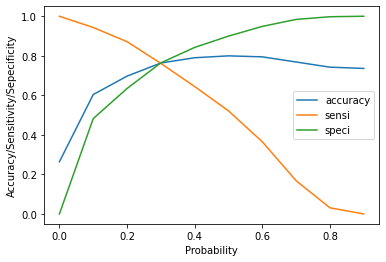

In [70]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability')
plt.ylabel('Accuracy/Sensitivity/Sepecificity')
plt.show()

### From the plot above, probability threshold of about 0.3 appears to be optimum

In [71]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.239950,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.021495,5789,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.039835,5008,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.572504,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.698437,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [72]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7634627108311319

In [73]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2768,  854],
       [ 310,  989]], dtype=int64)

In [74]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [75]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7613548883756736

In [76]:
# Let us calculate specificity
TN / float(TN+FP)

0.7642186637217007

In [77]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23578133627829928


In [78]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5366250678241997


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8992852501624431


## Calculate Precision and Recall

In [80]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3258,  364],
       [ 622,  677]], dtype=int64)

In [81]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6503362151777138

### 
Precsion
TP / TP + FP
Recall
TP / TP + FN

In [82]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5211701308698999

In [83]:
# Using sklearn utilities for the same

In [84]:
from sklearn.metrics import precision_score, recall_score

In [85]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6503362151777138

In [86]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5211701308698999

## Precision and recall tradeoff

In [87]:
from sklearn.metrics import precision_recall_curve

In [88]:
pd.DataFrame(zip(y_train_pred_final.Churn, y_train_pred_final.predicted))

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
4916,0,0
4917,0,0
4918,0,0
4919,0,0


In [89]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [90]:
pd.DataFrame(zip(p, r, thresholds), columns=('Precision', 'Recall', 'thesholds')).head(10)

,Precision,Recall,thesholds
0,0.269614,1.00000,0.006544
1,0.269462,0.99923,0.006565
2,0.269518,0.99923,0.006567
3,0.269574,0.99923,0.006587
4,0.269630,0.99923,0.006611
5,0.269686,0.99923,0.006611
6,0.269742,0.99923,0.006628
7,0.269798,0.99923,0.006653
8,0.269854,0.99923,0.006682
9,0.269911,0.99923,0.006692


### Plotting the Precision-Recall Curve
Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.
Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

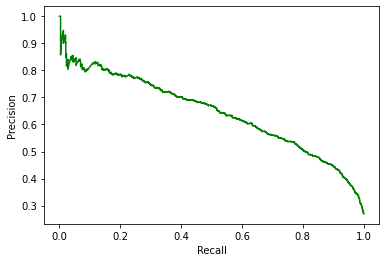

In [91]:
plt.plot(r[:-1], p[:-1], "g-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Plotting Precision and Recall against Thresholds

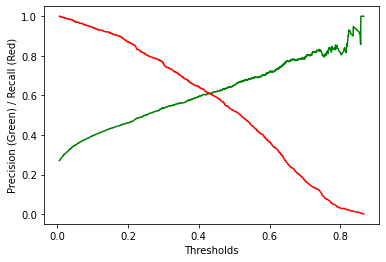

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Thresholds')
plt.ylabel('Precision (Green) / Recall (Red)')
plt.show()

In [94]:
#When to use ROC vs Precision-Recall Curve
#ROC curves should be used when there are roughly equal numbers of observations for each class.
#Precision-Recall curves should be used when there is a moderate to large class imbalance.
#>>> At this point, update our Threshold and recalculate


## Making predictions on the Test Data 

In [95]:
X_test = X_test[cols_model]
X_test

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingMovies_Yes
942,24,1,79.85,0,0,0,1,0,0,0,1
3729,62,1,20.05,0,0,1,1,0,0,0,0
1761,58,1,24.45,0,0,1,1,0,0,0,0
2283,1,1,71.55,0,0,0,0,0,0,0,0
1872,41,0,19.70,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,63,0,68.80,0,1,0,0,1,1,1,0
6347,15,1,68.60,0,0,0,0,0,0,0,0
6403,72,1,116.60,0,0,1,0,1,1,1,1
3597,25,1,95.70,0,0,0,1,0,0,1,1


In [96]:
scaler = StandardScaler()

X_test[['tenure','MonthlyCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges']])

X_test

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingMovies_Yes
942,-0.364216,1,0.493442,0,0,0,1,0,0,0,1
3729,1.188632,1,-1.498148,0,0,1,1,0,0,0,0
1761,1.025174,1,-1.351610,0,0,1,1,0,0,0,0
2283,-1.304098,1,0.217017,0,0,0,0,0,0,0,0
1872,0.330479,0,-1.509805,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,1.229496,0,0.125430,0,1,0,0,1,1,1,0
6347,-0.731996,1,0.118770,0,0,0,0,0,0,0,0
6403,1.597276,1,1.717370,0,0,1,0,1,1,1,1
3597,-0.323352,1,1.021313,0,0,0,1,0,0,1,1


In [97]:
list(zip(X_train1.columns, X_test.columns))

[('tenure', 'tenure'),
 ('PaperlessBilling', 'PaperlessBilling'),
 ('MonthlyCharges', 'MonthlyCharges'),
 ('SeniorCitizen', 'SeniorCitizen'),
 ('Contract_One year', 'Contract_One year'),
 ('Contract_Two year', 'Contract_Two year'),
 ('PaymentMethod_Credit card (automatic)',
  'PaymentMethod_Credit card (automatic)'),
 ('OnlineSecurity_Yes', 'OnlineSecurity_Yes'),
 ('OnlineBackup_Yes', 'OnlineBackup_Yes'),
 ('TechSupport_Yes', 'TechSupport_Yes'),
 ('StreamingMovies_Yes', 'StreamingMovies_Yes')]

## Predict

In [98]:
y_test_pred = logreg.predict(X_test)

In [99]:
list(zip(y_test_pred[:10], y_test[:10]))

[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0)]

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [101]:
# Let's see the head
y_pred_1.head()

,0
0,0
1,0
2,0
3,1
4,0


In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [106]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
# Renaming the column 
lr_probs_test = logreg.predict_proba(X_test)
lr_probs_test = lr_probs_test[:, 1]
y_pred_final['Churn_Prob'] = lr_probs_test
# y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [109]:
lr_probs_test

array([0.48545386, 0.00963604, 0.01246713, ..., 0.04184124, 0.46636045,
       0.00467462])

In [110]:
# Let's see the head of y_pred_final
y_pred_final

,Churn,CustID,0,Churn_Prob
0,0,942,0,0.485454
1,0,3729,0,0.009636
2,0,1761,0,0.012467
3,1,2283,1,0.655562
4,0,1872,0,0.015767
...,...,...,...,...
2105,0,1289,0,0.018915
2106,0,6347,1,0.521520
2107,0,6403,0,0.041841
2108,0,3597,0,0.466360


In [111]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [112]:
y_pred_final.head()

,Churn,CustID,0,Churn_Prob,final_predicted
0,0,942,0,0.485454,1
1,0,3729,0,0.009636,0
2,0,1761,0,0.012467,0
3,1,2283,1,0.655562,1
4,0,1872,0,0.015767,0


In [113]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7815165876777251

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1304,  236],
       [ 225,  345]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6052631578947368

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.8467532467532467